In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

# Add the project directory to the path
project_dir = Path.cwd().parent
sys.path.append(str(project_dir))

# Import project modules
from src.data.data_ingestion import DataIngestion
from src.data.data_preprocessing import DataPreprocessing
from src.features.macro_indicators import MacroIndicators
from src.features.sector_indicators import SectorIndicators
from src.models.sector_rotation import SectorRotationModel
from src.models.benchmark_model import BenchmarkModel

# Set up plotting
plt.style.use('seaborn-darkgrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

# Configure pandas to display more columns and rows
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)


C:\Users\aumpa\AppData\Local\Temp\ipykernel_24024\2869861867.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Initialize data directories
data_dir = project_dir / "data"
raw_dir = data_dir / "raw"
processed_dir = data_dir / "processed"


In [3]:
# Create directories if they don't exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

In [4]:
# Initialize data ingestion and preprocessing
data_ingestion = DataIngestion(data_dir)
data_preprocessing = DataPreprocessing(data_ingestion)

2025-05-05 19:04:08,499 - src.data.data_ingestion - INFO - Data directories initialized: d:\Sector Rotation Strategy\Sector-Rotation-Strategy\data
2025-05-05 19:04:08,500 - src.data.data_preprocessing - INFO - DataPreprocessing initialized


In [5]:
# Check if processed data files exist
portfolio_processed = processed_dir / "portfolio_data.csv"
price_processed = processed_dir / "price_data.csv"
sector_processed = processed_dir / "sector_data.csv"
macro_processed = processed_dir / "macro_data.csv"

In [6]:
files_exist = all([
    os.path.exists(portfolio_processed),
    os.path.exists(price_processed),
    os.path.exists(sector_processed),
    os.path.exists(macro_processed)
])

# Run preprocessing if files don't exist
if not files_exist:
    print("Running data preprocessing pipeline...")
    portfolio_df, prices_df, sector_df, macro_df = data_preprocessing.run_preprocessing_pipeline()
    print("Preprocessing complete.")
else:
    print("Processed data files already exist.")

Processed data files already exist.


In [7]:
# Check if indicator files exist
macro_indicators_file = processed_dir / "macro_indicators.csv"
sector_indicators_file = processed_dir / "sector_indicators.csv"


In [8]:

# Generate macro indicators if needed
if not os.path.exists(macro_indicators_file):
    print("Generating macro indicators...")
    macro_indicators = MacroIndicators(data_dir)
    macro_indicators_df = macro_indicators.generate_macro_features()
    print("Macro indicators generated.")
else:
    print("Macro indicators already exist.")
    macro_indicators_df = pd.read_csv(macro_indicators_file)
    macro_indicators_df['Date'] = pd.to_datetime(macro_indicators_df['Date'])


Macro indicators already exist.


In [9]:
# Generate sector indicators if needed
if not os.path.exists(sector_indicators_file):
    print("Generating sector indicators...")
    sector_indicators = SectorIndicators(data_dir)
    sector_indicators_df = sector_indicators.generate_sector_features()
    print("Sector indicators generated.")
else:
    print("Sector indicators already exist.")
    sector_indicators_df = pd.read_csv(sector_indicators_file)
    sector_indicators_df['Date'] = pd.to_datetime(sector_indicators_df['Date'])

Sector indicators already exist.


In [10]:
# Load processed data
portfolio_df = pd.read_csv(processed_dir / "portfolio_data.csv")
prices_df = pd.read_csv(processed_dir / "price_data.csv")
prices_df['Date'] = pd.to_datetime(prices_df['Date'])

In [11]:
# Display basic info
print("Portfolio data shape:", portfolio_df.shape)
print("Price data shape:", prices_df.shape)
print("Sector indicators shape:", sector_indicators_df.shape)
print("Macro indicators shape:", macro_indicators_df.shape)

Portfolio data shape: (27, 6)
Price data shape: (35397, 9)
Sector indicators shape: (15732, 39)
Macro indicators shape: (1311, 22)


In [12]:
portfolio_df.head()

,Ticker,Quantity,Sector,Close,Weight,Market_Value
0,AAPL,1,IT,218.270004,0.034613,218.270004
1,ADAP,1,Pharmaceuticals,0.291000,0.000046,0.291000
2,AGCO,1,Agriculture,93.089996,0.014762,93.089996
3,BA,2,Military Engineering,178.110001,0.028244,356.220002
4,BG,4,Agriculture,73.250000,0.011616,293.000000


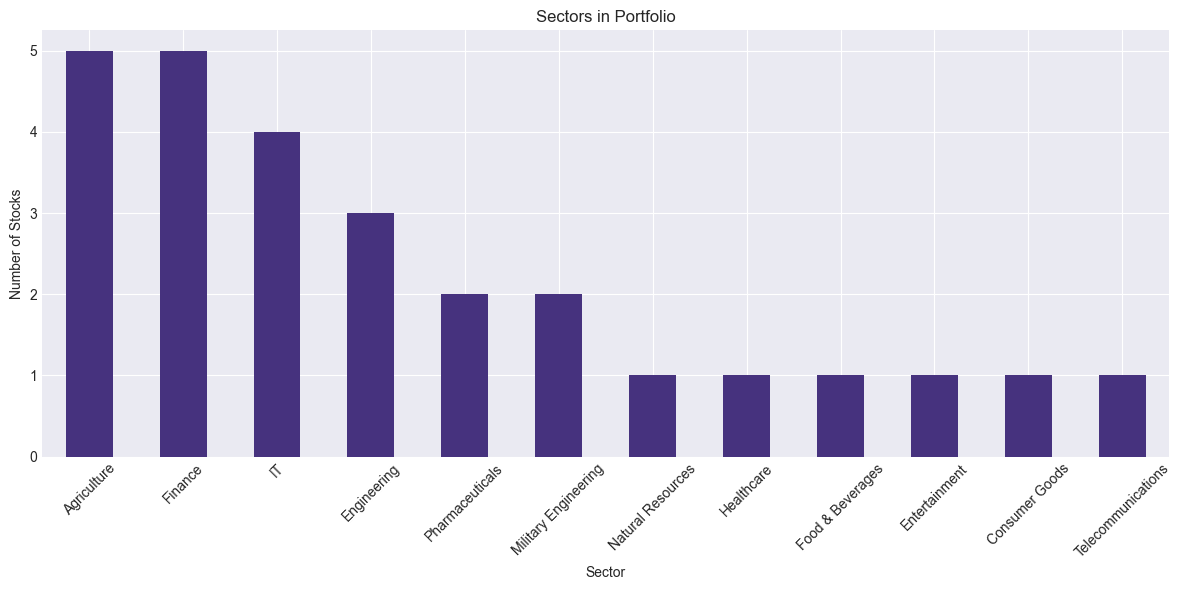

In [13]:
# Show distribution of sectors in portfolio
plt.figure(figsize=(12, 6))
sector_counts = portfolio_df['Sector'].value_counts()
sector_counts.plot(kind='bar')
plt.title('Sectors in Portfolio')
plt.xlabel('Sector')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

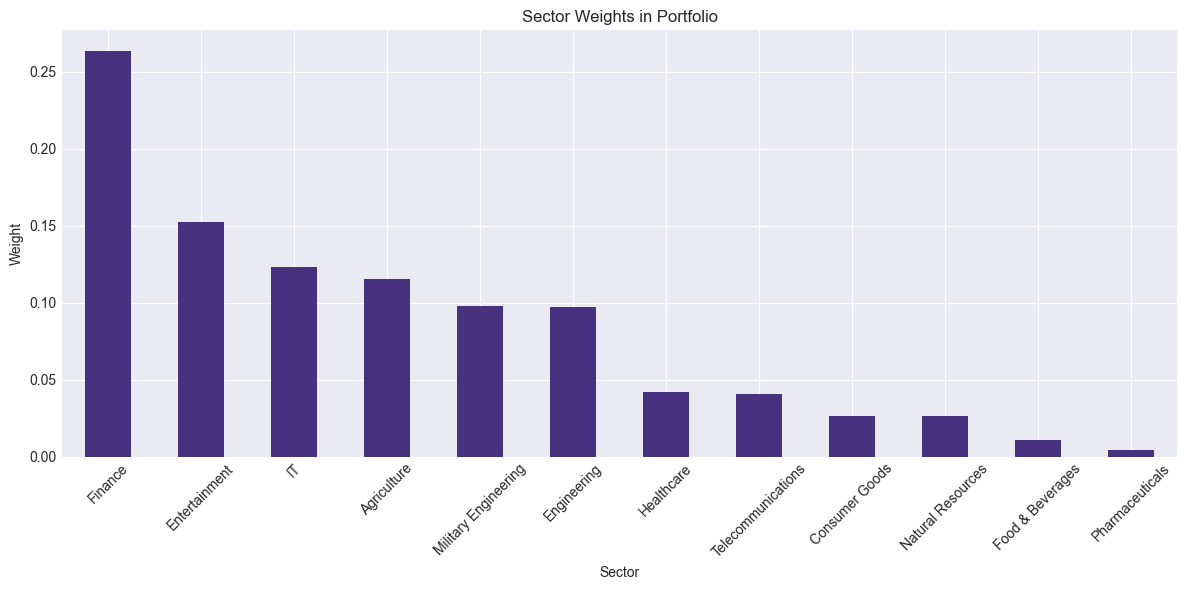

In [14]:
# Show sector weights in portfolio
sector_weights = portfolio_df.groupby('Sector')['Weight'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sector_weights.plot(kind='bar')
plt.title('Sector Weights in Portfolio')
plt.xlabel('Sector')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Display date range for the price data
date_range = prices_df['Date'].agg(['min', 'max'])
print(f"\nPrice data spans from {date_range['min'].strftime('%Y-%m-%d')} to {date_range['max'].strftime('%Y-%m-%d')}")
print(f"Total of {len(prices_df['Date'].unique())} trading days")


Price data spans from 2020-01-03 to 2025-03-21
Total of 1311 trading days


In [16]:
sector_indicators_df.columns.tolist()

['Date',
 'Sector',
 'Returns',
 'Volume',
 'Adjusted',
 'Cumulative_Returns',
 'Return_20d',
 'Return_50d',
 'Volatility_20d',
 'Market_Returns',
 'Relative_Strength',
 'Relative_Strength_20d',
 'Relative_Strength_50d',
 'RS_Trend',
 'Momentum_1m',
 'Momentum_3m',
 'Momentum_6m',
 'Momentum_12m',
 'Momentum_Score',
 'Volatility_1m',
 'Volatility_3m',
 'Volatility_Trend',
 'Market_Volatility_1m',
 'Relative_Volatility',
 'Economic_Cycle',
 'Contraction_Returns',
 'Early_Recovery_Returns',
 'Expansion_Returns',
 'Late_Cycle_Returns',
 'Expected_Contraction_Returns',
 'Expected_Early_Recovery_Returns',
 'Expected_Expansion_Returns',
 'Expected_Late_Cycle_Returns',
 'Cycle_Expectation_Score',
 'Relative_Strength_20d_Rank',
 'Momentum_Score_Rank',
 'Volatility_1m_Rank',
 'Composite_Rank',
 'Final_Rank']

In [17]:
# Get unique sectors
unique_sectors = sector_indicators_df['Sector'].unique()
print(f"\nUnique Sectors ({len(unique_sectors)}):")
print(unique_sectors)


Unique Sectors (12):
['Agriculture' 'Consumer Goods' 'Engineering' 'Entertainment' 'Finance'
 'Food & Beverages' 'Healthcare' 'IT' 'Military Engineering'
 'Natural Resources' 'Pharmaceuticals' 'Telecommunications']


In [18]:
# Look at key indicators for each sector
key_indicators = ['Returns', 'Volatility_1m', 'Momentum_Score', 'Relative_Strength_20d']
available_indicators = [col for col in key_indicators if col in sector_indicators_df.columns]



Average Sector Performance Metrics:
                       Returns  Volatility_1m  Momentum_Score  Relative_Strength_20d
Sector                                                                              
Entertainment         0.001422       0.389502        0.084836               0.000810
Telecommunications    0.001067       0.243777        0.058708               0.000490
IT                    0.000925       0.258623        0.057655               0.000332
Finance               0.000862       0.217471        0.055648               0.000288
Natural Resources     0.000680       0.288215        0.068759               0.000096
Agriculture           0.000603       0.277315        0.061721               0.000023
Engineering           0.000477       0.252233        0.048324              -0.000074
Consumer Goods        0.000415       0.179320        0.026655              -0.000161
Food & Beverages      0.000380       0.177760        0.031458              -0.000212
Military Engineering  0.0001

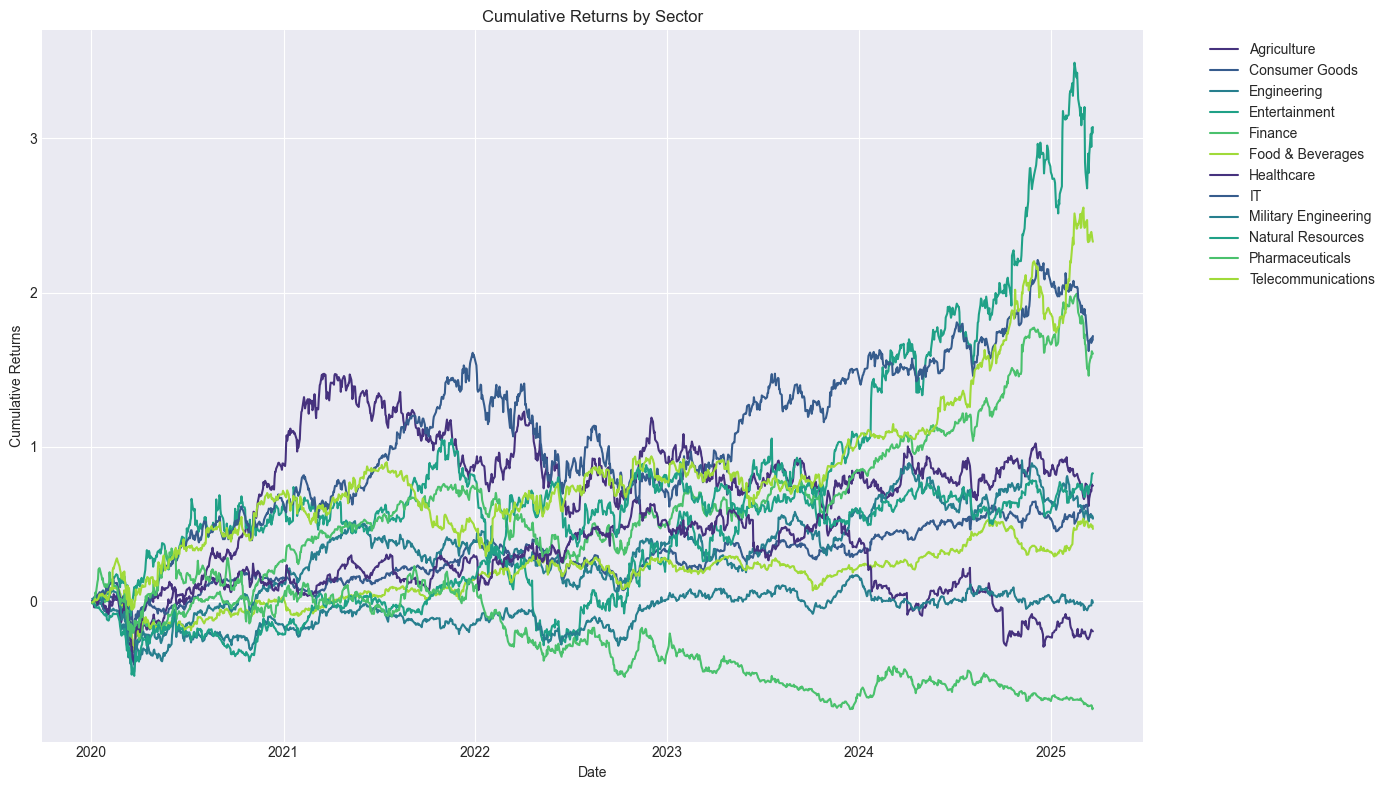

In [19]:
if available_indicators:
    # Calculate average values for each sector
    sector_avg = sector_indicators_df.groupby('Sector')[available_indicators].mean()
    
    print("\nAverage Sector Performance Metrics:")
    print(sector_avg.sort_values('Returns', ascending=False))
    
    # Plot sector performance over time
    plt.figure(figsize=(14, 8))
    
    for sector in unique_sectors:
        sector_data = sector_indicators_df[sector_indicators_df['Sector'] == sector]
        plt.plot(sector_data['Date'], sector_data['Cumulative_Returns'], label=sector)
    
    plt.title('Cumulative Returns by Sector')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
# Explore macro indicators
macro_indicators_df.columns.tolist()

['Date',
 'Returns',
 'Volume',
 'Adjusted',
 'Market_Momentum_20d',
 'Market_Trend_50d',
 'Market_Volatility_20d',
 'Volume_Trend_20d',
 'Market_Return',
 'Risk_Free_Rate',
 'VIX',
 'VIX_MA_10d',
 'VIX_TREND',
 'VIX_Regime',
 'Market_Return_MA_20d',
 'Market_Return_MA_50d',
 'Market_Trend_Regime',
 'Risk_Free_Rate_Trend',
 'Rate_Regime',
 'Market_Return_Momentum',
 'VIX_Momentum',
 'Economic_Cycle']


Economic Cycle Distribution:
1    444
2    395
3    354
0    118
Name: Economic_Cycle, dtype: int64


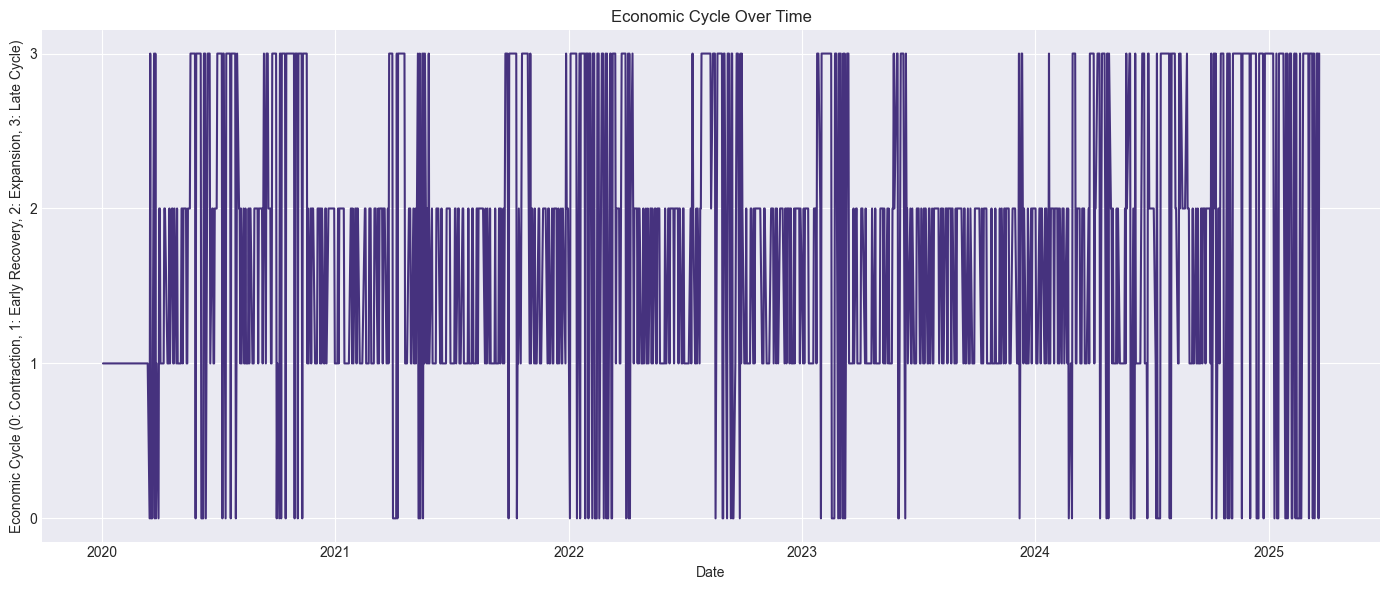

In [21]:
# Check if Economic_Cycle is available
if 'Economic_Cycle' in macro_indicators_df.columns:
    # Count occurrences of each economic cycle
    cycle_counts = macro_indicators_df['Economic_Cycle'].value_counts()
    print("\nEconomic Cycle Distribution:")
    print(cycle_counts)
    
    # Plot economic cycle over time
    plt.figure(figsize=(14, 6))
    plt.plot(macro_indicators_df['Date'], macro_indicators_df['Economic_Cycle'])
    plt.title('Economic Cycle Over Time')
    plt.xlabel('Date')
    plt.ylabel('Economic Cycle (0: Contraction, 1: Early Recovery, 2: Expansion, 3: Late Cycle)')
    plt.yticks([0, 1, 2, 3])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
# Plot other key macro indicators
key_macro = ['Market_Return', 'VIX', 'Market_Volatility_20d']
available_macro = [col for col in key_macro if col in macro_indicators_df.columns]

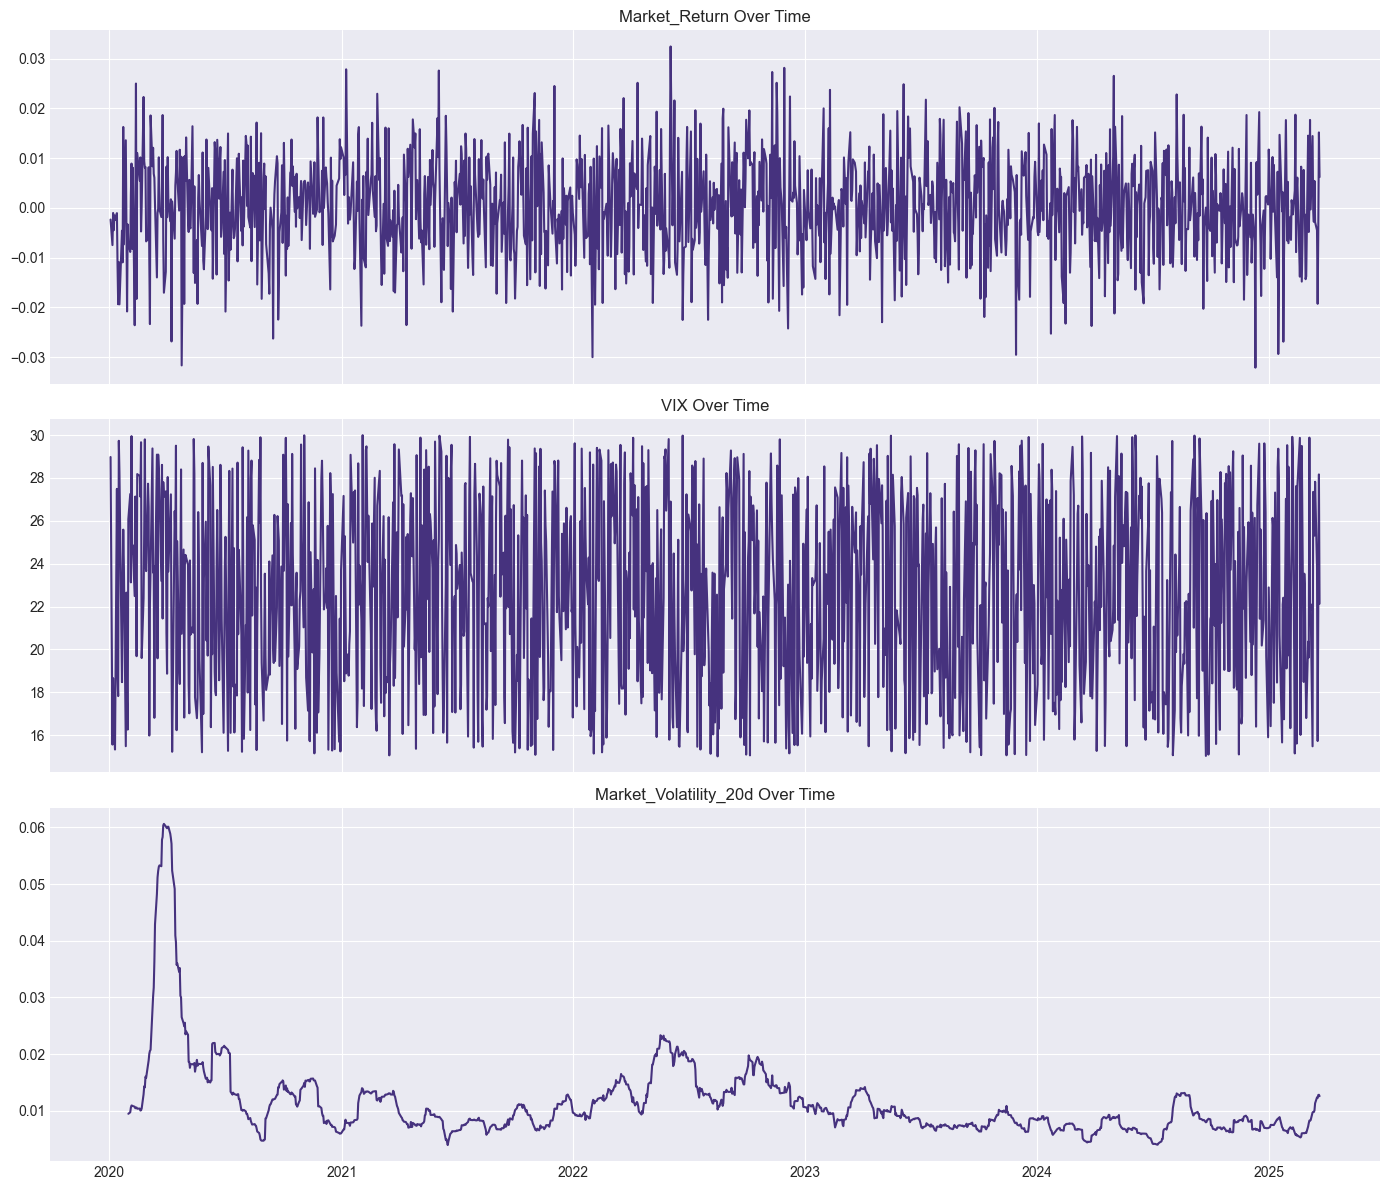

In [23]:
if available_macro:
    fig, axes = plt.subplots(len(available_macro), 1, figsize=(14, 4*len(available_macro)), sharex=True)
    
    for i, indicator in enumerate(available_macro):
        axes[i].plot(macro_indicators_df['Date'], macro_indicators_df[indicator])
        axes[i].set_title(f'{indicator} Over Time')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

In [24]:
# Initialize the SectorRotationModel
sector_rotation = SectorRotationModel(data_dir)


2025-05-05 19:07:14,940 - src.models.sector_rotation - INFO - SectorRotationModel initialized with data directory: d:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [25]:
# Define backtest period
# Use the entire date range from our data
start_date = prices_df['Date'].min()
end_date = prices_df['Date'].max()

print(f"Running backtest from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")


Running backtest from 2020-01-03 to 2025-03-21


In [26]:
# Implement momentum strategy
momentum_results = sector_rotation.momentum_strategy(
    sector_indicators_df, 
    n_sectors=3, 
    rebalance_frequency='M',
    start_date=start_date,
    end_date=end_date
)

2025-05-05 19:07:26,777 - src.models.sector_rotation - INFO - Implementing momentum strategy with top 3 sectors and M rebalancing
2025-05-05 19:07:27,095 - src.models.sector_rotation - INFO - Rebalancing will occur on 63 dates
2025-05-05 19:07:30,447 - src.models.sector_rotation - INFO - Momentum strategy implemented successfully


In [27]:
# Implement relative strength strategy
relative_strength_results = sector_rotation.relative_strength_strategy(
    sector_indicators_df, 
    n_sectors=3, 
    rebalance_frequency='M',
    start_date=start_date,
    end_date=end_date
)

2025-05-05 19:07:33,301 - src.models.sector_rotation - INFO - Implementing relative strength strategy with top 3 sectors and M rebalancing
2025-05-05 19:07:33,618 - src.models.sector_rotation - INFO - Rebalancing will occur on 63 dates
2025-05-05 19:07:37,063 - src.models.sector_rotation - INFO - Relative strength strategy implemented successfully


In [28]:
# Implement economic cycle strategy
economic_cycle_results = sector_rotation.economic_cycle_strategy(
    sector_indicators_df, 
    macro_indicators_df,
    n_sectors=3, 
    rebalance_frequency='M',
    start_date=start_date,
    end_date=end_date
)


2025-05-05 19:07:38,575 - src.models.sector_rotation - INFO - Implementing economic cycle strategy with top 3 sectors and M rebalancing
2025-05-05 19:07:38,956 - src.models.sector_rotation - INFO - Rebalancing will occur on 63 dates
2025-05-05 19:07:42,644 - src.models.sector_rotation - INFO - Economic cycle strategy implemented successfully


In [29]:
# Implement combined strategy
combined_results = sector_rotation.combined_strategy(
    sector_indicators_df, 
    macro_indicators_df,
    n_sectors=3, 
    rebalance_frequency='M',
    weights={'momentum': 0.4, 'relative_strength': 0.4, 'economic_cycle': 0.2},
    start_date=start_date,
    end_date=end_date
)

2025-05-05 19:07:45,370 - src.models.sector_rotation - INFO - Implementing combined strategy with top 3 sectors and M rebalancing
2025-05-05 19:07:45,695 - src.models.sector_rotation - INFO - Rebalancing will occur on 63 dates
2025-05-05 19:07:49,390 - src.models.sector_rotation - INFO - Combined strategy implemented successfully


In [30]:
# Combine all results
all_sector_rotation_results = pd.concat([
    momentum_results,
    relative_strength_results,
    economic_cycle_results,
    combined_results
])

In [31]:
# Initialize the BenchmarkModel
benchmark = BenchmarkModel(data_dir)

2025-05-05 19:07:56,156 - src.models.benchmark_model - INFO - BenchmarkModel initialized with data directory: d:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [32]:
# Implement buy and hold strategy
buy_hold_results = benchmark.buy_and_hold_strategy(
    portfolio_df, 
    prices_df,
    start_date=start_date,
    end_date=end_date
)


2025-05-05 19:08:00,957 - src.models.benchmark_model - INFO - Implementing buy and hold strategy
2025-05-05 19:08:04,578 - src.models.benchmark_model - INFO - Buy and hold strategy implemented successfully


In [33]:
# Implement equal weight strategy
equal_weight_results = benchmark.equal_weight_strategy(
    portfolio_df, 
    prices_df,
    rebalance_frequency='Q',
    start_date=start_date,
    end_date=end_date
)

2025-05-05 19:08:05,744 - src.models.benchmark_model - INFO - Implementing equal weight strategy with Q rebalancing
2025-05-05 19:08:05,862 - src.models.benchmark_model - INFO - Rebalancing will occur on 21 dates
2025-05-05 19:08:08,873 - src.models.benchmark_model - INFO - Equal weight strategy implemented successfully


In [34]:
# Implement market cap weighted strategy
market_cap_results = benchmark.market_cap_weighted_strategy(
    portfolio_df, 
    prices_df,
    rebalance_frequency='Q',
    start_date=start_date,
    end_date=end_date
)

2025-05-05 19:08:09,418 - src.models.benchmark_model - INFO - Implementing market cap weighted strategy with Q rebalancing
2025-05-05 19:08:09,534 - src.models.benchmark_model - INFO - Rebalancing will occur on 21 dates
2025-05-05 19:08:12,516 - src.models.benchmark_model - INFO - Market cap weighted strategy implemented successfully


In [35]:
# Combine all benchmark results
all_benchmark_results = pd.concat([
    buy_hold_results,
    equal_weight_results,
    market_cap_results
])

In [36]:
# Combine all results
all_results = pd.concat([all_sector_rotation_results, all_benchmark_results])


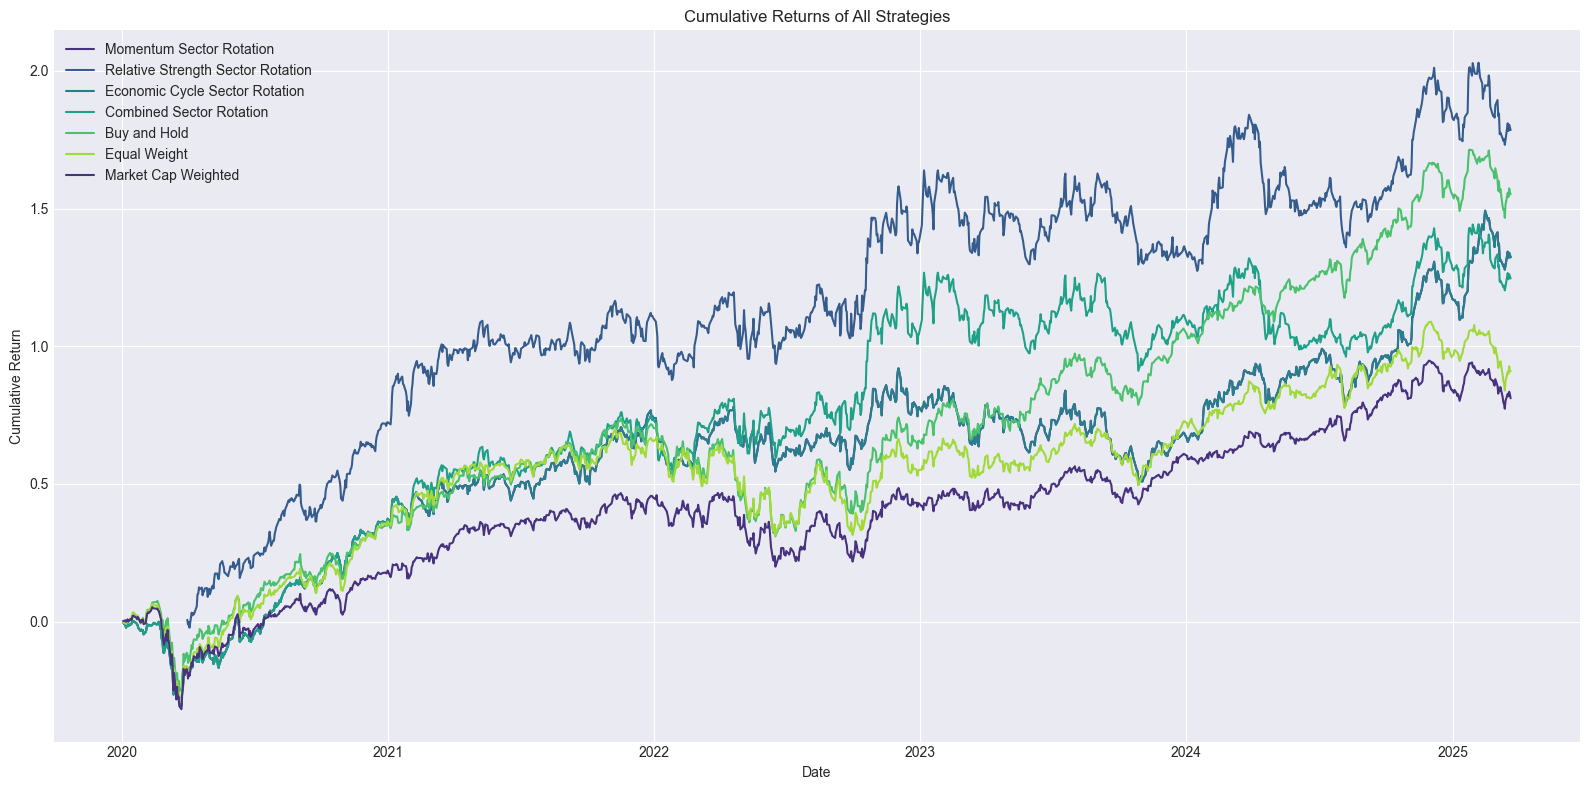

In [37]:
# Plot performance of all strategies
plt.figure(figsize=(16, 8))

for strategy in all_results['Strategy'].unique():
    strategy_data = all_results[all_results['Strategy'] == strategy]
    plt.plot(strategy_data['Date'], strategy_data['Cumulative_Return'], label=strategy)

plt.title('Cumulative Returns of All Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Calculate performance metrics
performance_metrics = []

In [39]:
for strategy in all_results['Strategy'].unique():
    strategy_data = all_results[all_results['Strategy'] == strategy]
    
    # Calculate metrics
    total_return = strategy_data['Cumulative_Return'].iloc[-1]
    daily_returns = strategy_data['Daily_Return'].values
    
    # Annualized return (assuming 252 trading days per year)
    n_years = len(strategy_data) / 252
    annualized_return = (1 + total_return) ** (1 / n_years) - 1
    
    # Volatility (annualized)
    volatility = daily_returns.std() * np.sqrt(252)
    
    # Sharpe ratio (assuming 0% risk-free rate for simplicity)
    sharpe_ratio = annualized_return / volatility
    
    # Maximum drawdown
    cumulative_returns = strategy_data['Cumulative_Return'].values
    max_drawdown = 0
    peak = cumulative_returns[0]
    
    for ret in cumulative_returns:
        if ret > peak:
            peak = ret
        drawdown = (peak - ret) / (1 + peak)
        max_drawdown = max(max_drawdown, drawdown)
    
    performance_metrics.append({
        'Strategy': strategy,
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    })

In [40]:
# Create performance metrics dataframe
performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.sort_values('Sharpe Ratio', ascending=False)


In [41]:
# Format metrics for display
for col in ['Total Return', 'Annualized Return', 'Volatility', 'Max Drawdown']:
    performance_df[col] = performance_df[col].map('{:.2%}'.format)
performance_df['Sharpe Ratio'] = performance_df['Sharpe Ratio'].map('{:.2f}'.format)


In [42]:
# Display performance metrics
print("\nPerformance Metrics:")
print(performance_df)


Performance Metrics:
                            Strategy Total Return Annualized Return Volatility Sharpe Ratio Max Drawdown
1  Relative Strength Sector Rotation      178.53%            22.92%     20.97%         1.09       16.94%
4                       Buy and Hold      155.22%            19.73%     21.40%         0.92       30.43%
0           Momentum Sector Rotation      132.31%            17.59%     21.88%         0.80       30.67%
2     Economic Cycle Sector Rotation      132.31%            17.59%     21.88%         0.80       30.67%
3           Combined Sector Rotation      124.62%            16.83%     23.04%         0.73       30.67%
5                       Equal Weight       90.95%            13.24%     21.49%         0.62       33.61%
6                Market Cap Weighted       81.12%            12.09%     20.34%         0.59       35.21%


In [43]:
# Plot sector allocation over time for the best performing strategy
best_strategy = performance_df['Strategy'].iloc[0]
best_strategy_data = all_results[all_results['Strategy'] == best_strategy]


<Figure size 1600x800 with 0 Axes>

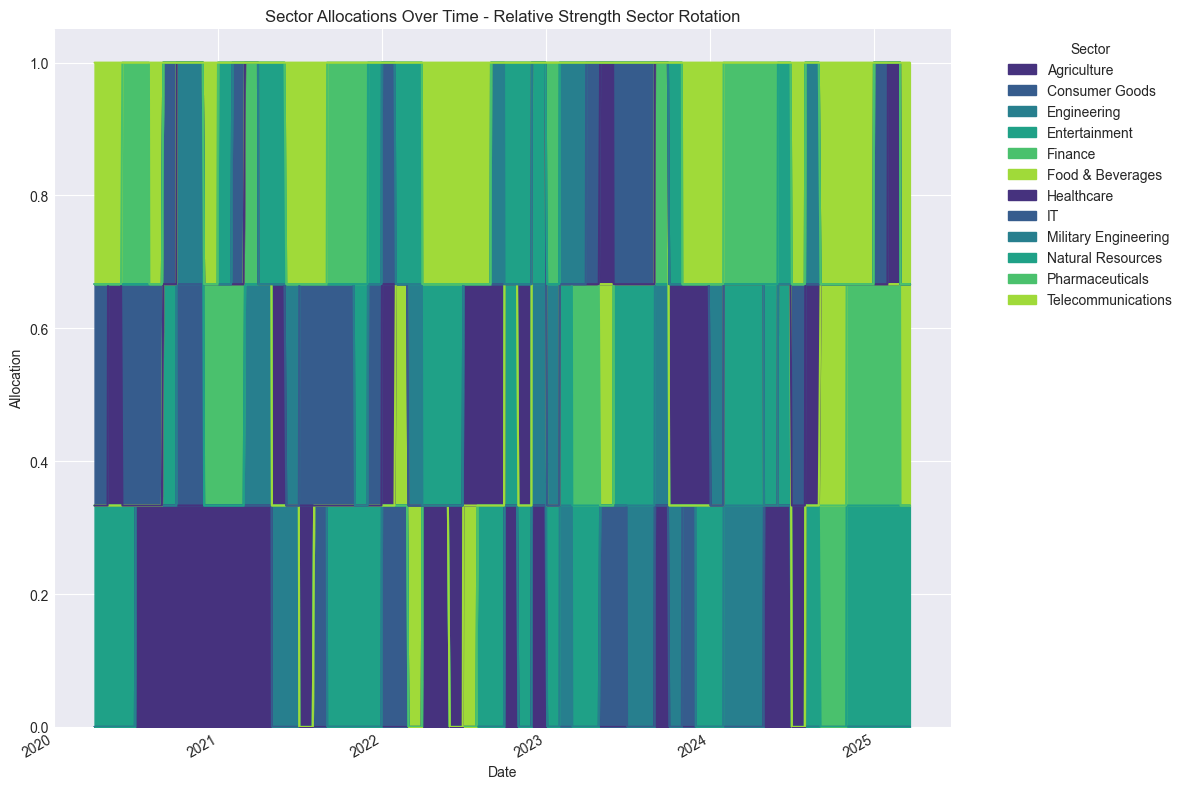


Results saved to d:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\strategy_comparison_results.csv
Performance metrics saved to d:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\strategy_performance_metrics.csv


In [44]:
if 'Selected_Sectors' in best_strategy_data.columns:
    # Create a pivot table of sector allocations over time
    sector_allocations = []
    
    for _, row in best_strategy_data.iterrows():
        date = row['Date']
        sectors = row['Selected_Sectors'].split(', ')
        
        for sector in sectors:
            allocation = 1.0 / len(sectors)  # Equal weight within selected sectors
            sector_allocations.append({
                'Date': date,
                'Sector': sector,
                'Allocation': allocation
            })
    
    allocation_df = pd.DataFrame(sector_allocations)
    
    # Plot sector allocations
    plt.figure(figsize=(16, 8))
    
    # Pivot the data for area plot
    pivot_data = allocation_df.pivot_table(
        index='Date', 
        columns='Sector', 
        values='Allocation', 
        aggfunc='sum'
    ).fillna(0)
    
    pivot_data.plot.area(stacked=True)
    
    plt.title(f'Sector Allocations Over Time - {best_strategy}')
    plt.xlabel('Date')
    plt.ylabel('Allocation')
    plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
# Save results to CSV
all_results.to_csv(processed_dir / "strategy_comparison_results.csv", index=False)
performance_df.to_csv(processed_dir / "strategy_performance_metrics.csv", index=False)

print(f"\nResults saved to {processed_dir / 'strategy_comparison_results.csv'}")
print(f"Performance metrics saved to {processed_dir / 'strategy_performance_metrics.csv'}")
